<a href="https://colab.research.google.com/github/PriyathamVarma/LendingLoan/blob/main/Recommendation_Engines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 style="color:blue">Recommendation systems</h2>
# <h3>Popularity based systems</h3>
# <ul>
#      <li>Most basic of all systems</li>
#      <li>Recommends items with most ratings(popular)</li>
#      <li>The drawback is that it cant produce personalized recommendations.</li>      
#</ul>




In [ ]:
# Import python libraries for data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read the data frame
data_frame = pd.read_csv('https://raw.githubusercontent.com/PriyathamVarma/ratings/main/chefmozcuisine.csv')
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   placeID   916 non-null    int64 
 1   Rcuisine  916 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.4+ KB


In [ ]:
# Groupby Rcuisine for most occuring and get most popular cuisines with places count
cuisine_df = data_frame.groupby('Rcuisine').count().sort_values(by='placeID',axis=0,ascending=False
                       )
cuisine_df


,placeID
Rcuisine,
Mexican,239
International,62
American,59
Dutch-Belgian,55
Italian,42
Greek,33
Bar,32
French,31
Cafe-Coffee_Shop,27


In [ ]:
# Taking top 10 only
cuisine_df.info() # Total 59 unique values
cuisine_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, Mexican to Afghan
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   placeID  59 non-null     int64
dtypes: int64(1)
memory usage: 3.4+ KB


,placeID
count,59.000000
mean,15.525424
std,33.082111
min,1.000000
25%,1.500000
50%,6.000000
75%,17.500000
max,239.000000



OBSERVATIONS 
1. Mexican has the highest frequency of places
2. The top 5 are mexican, International, american, Dutch-belgian and Italian
3. The last 5 are ethiopian, persian, afghan, fine_dining and korean.
4. Mean 15 indicates that on an average the cuisines are popular in atleast 15 places
5. 75% percantile indicates that a cuisine occuring in 17 places is considerable.

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Mexican to Japanese
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   placeID  16 non-null     int64
dtypes: int64(1)
memory usage: 256.0+ bytes


,placeID
Rcuisine,
Mexican,239
International,62
American,59
Dutch-Belgian,55
Italian,42
Greek,33
Bar,32
French,31
Cafe-Coffee_Shop,27


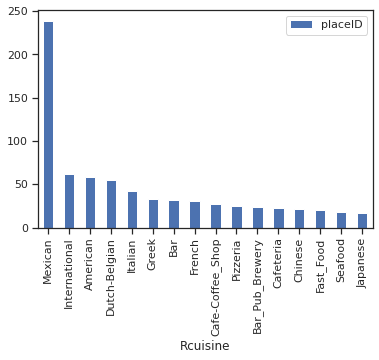

In [ ]:
# Getting cusines occuring in atleast 17 places and more
new_cusine_df = cuisine_df[cuisine_df.placeID>=17]
new_cusine_df.info()# Total 16 cusines are most popular
new_cusine_df.plot(kind="bar")

new_cusine_df

In [ ]:
# Second part
# Now that we got most popular/occuring cuisines, we have to analyse peoples bahaviours and thier prefernces for the cuisines
user_data_frame = pd.read_csv('https://raw.githubusercontent.com/PriyathamVarma/ratings/main/usercuisine.csv')
user_data_frame

,userID,Rcuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast-Brunch
...,...,...
325,U1135,Southern
326,U1135,Dessert-Ice_Cream
327,U1136,Mexican
328,U1137,Mexican


In [ ]:
# Groupby most preferred cuisine
userCuisine_data_frame = user_data_frame.groupby('Rcuisine').count().sort_values(by="userID",axis=0,ascending=False)
userCuisine_data_frame.describe()

,userID
count,103.000000
mean,3.203883
std,9.567469
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,97.000000


In [ ]:
# Get 75% top preferred cuisines by users
newUserCuisine_data_frame = userCuisine_data_frame[userCuisine_data_frame.userID>=3]
newUserCuisine_data_frame

,userID
Rcuisine,
Mexican,97
American,11
Pizzeria,9
Cafeteria,9
Cafe-Coffee_Shop,8
Family,8
Japanese,7
Italian,7
Hot_Dogs,6


In [ ]:
popularCuisine_byPlace = new_cusine_df
popularCuisine_byUser = newUserCuisine_data_frame

# Create new dataframe
#study_data_frame = pd.DataFrame()

newList = [popularCuisine_byPlace,popularCuisine_byUser]

study_data_frame = pd.concat(newList, axis =1)
new_study_dataFrame = study_data_frame.fillna(method='bfill')
new_study_dataFrame

,placeID,userID
Mexican,239.0,97.0
International,62.0,11.0
American,59.0,11.0
Dutch-Belgian,55.0,7.0
Italian,42.0,7.0
Greek,33.0,3.0
Bar,32.0,3.0
French,31.0,8.0
Cafe-Coffee_Shop,27.0,8.0
Pizzeria,25.0,9.0


In [ ]:
#Taking top 10 cuisines based on both user prefernces and places
new_study_dataFrame.isna()

final_data_frame = new_study_dataFrame[new_study_dataFrame.isna() == False]
final_data_frame.head(10) # Taking top 10

,placeID,userID
Mexican,239.0,97.0
International,62.0,11.0
American,59.0,11.0
Dutch-Belgian,55.0,7.0
Italian,42.0,7.0
Greek,33.0,3.0
Bar,32.0,3.0
French,31.0,8.0
Cafe-Coffee_Shop,27.0,8.0
Pizzeria,25.0,9.0


In [ ]:
final_data_frame.corr()

,placeID,userID
placeID,1.000000,0.968642
userID,0.968642,1.000000


In [ ]:
# Sorting values by user prefernces as popularity is also to be considered based on user tastes
final_data_frame.sort_values(by='userID',ascending=False).head(10)

,placeID,userID
Mexican,239.0,97.0
American,59.0,11.0
International,62.0,11.0
Cafeteria,23.0,9.0
Bar_Pub_Brewery,24.0,9.0
Pizzeria,25.0,9.0
Cafe-Coffee_Shop,27.0,8.0
Family,NaN,8.0
French,31.0,8.0
Italian,42.0,7.0


In [ ]:
# By comparing top cuisines based on users and places
# for places the top 5 are Mexican, International, Italian, Dutch-belgian, American.
# for users the top 5 are Mexican, American, International, Cafeteria, Bar_Pub_Brewery.
# It can be observed that in the both cases Mexican, International, American exists. This says that this three will be popular no matter what.
# So this three cuisines can be recommended to anyone in any place.